## Plot composite reflectivity for two cases

- composite reflectivity from SEA-POL: /huracan/tank4/cornell/ORCESTRA/sea-pol/qc_data/level4v1.2/PICCOLO_level4_composite_2D.nc 
    - on ipfs at ipfs://bafybeigdehy7635uypwipv5xdnlvgnlbncvuyudajwejawn2llirbp2vyq
- merged circle composite reflectivity: gridded_composite_20240903_1500.nc

In [1]:
import geopy.distance
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, colors
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap,Normalize
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import cmweather
import seaborn as sns
import numpy as np
import xarray as xr
import pandas as pd
from scipy.interpolate import interp2d, RectBivariateSpline
from datetime import datetime, timedelta
import cftime

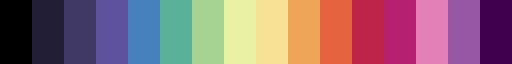

In [2]:
# Load colormap

# Read the colormap from a .txt file
def load_colormap_from_txt(file_path):
    # Load RGB values from the file
    rgb_values = np.loadtxt(file_path)
    return ListedColormap(rgb_values)

# Example usage
colormap_file = 'chase-spectral-rgb.txt'  # Replace with your .txt file path
radar_cmap = load_colormap_from_txt(colormap_file)

discrete_cmap = ListedColormap(radar_cmap(np.linspace(0, 1, 16)))
discrete_mask_cmap = discrete_cmap.copy()
discrete_mask_cmap.set_under(color='white') #set values below vmin to white
discrete_mask_cmap.set_bad(color='gray') #set missing (NaN) values to gray

discrete_mask_cmap

Define time period of case study

In [58]:
#Define time period
time_map1 = np.datetime64('2024-09-23T12:00')
str_map1 = '2024-09-23 12:00'
time_map2 = np.datetime64('2024-09-03T15:00') #really the merged circle from 1500-1520
str_map2 = '2024-09-03 15:00 - 15:20'

SEA-POL reflectivity

In [4]:
#Load data
#seapol = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/sea-pol/qc_data/level4v1.2/PICCOLO_level4_composite_2D.nc'
seapol = xr.open_dataset("ipfs://bafybeigdehy7635uypwipv5xdnlvgnlbncvuyudajwejawn2llirbp2vyq", engine="zarr")

#Find indices
index_map1 = np.abs(pd.to_datetime(seapol.time) - time_map1).argmin()
map1 = seapol.DBZ[index_map1,:,:]

Merged circle composite

In [5]:
circle = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/sea-pol/qc_data/level4v1.2/circle_test/gridded_composite_20240903_1500.nc')
map2 = circle.DBZ[0,:,:]

Make plot

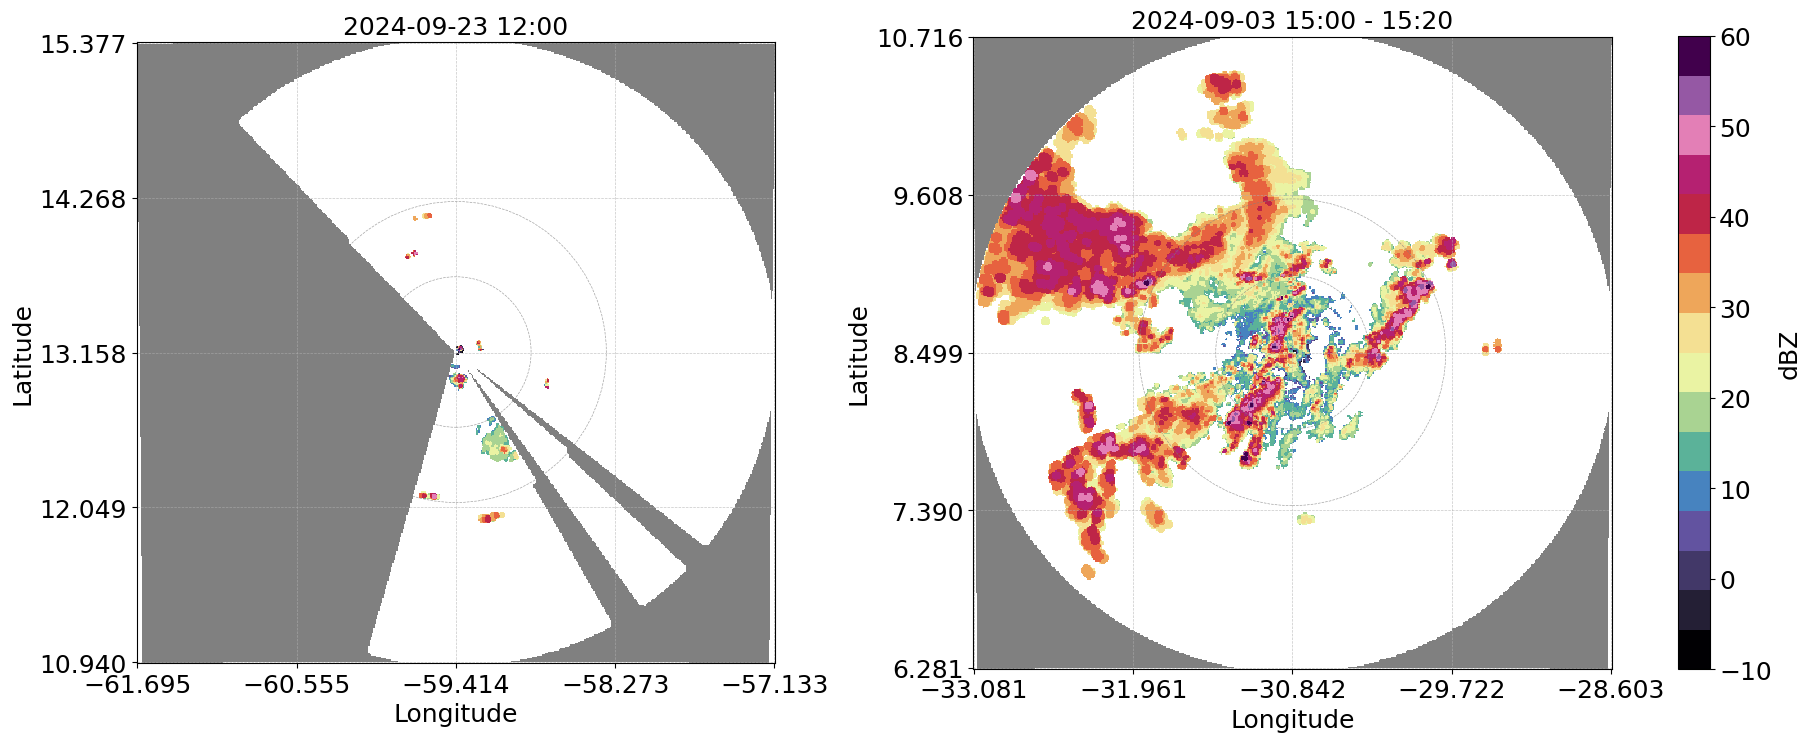

In [59]:
# Make plot
fig, axs = plt.subplots(1,2, figsize=(18, 8),layout="constrained")  # 1 row, 2 column

cax = axs[0].pcolormesh(map1.longitude, map1.latitude, map1, cmap=discrete_mask_cmap, vmin=-10, vmax=60,shading='auto')
axs[0].set_aspect('equal',adjustable='box')
#cbar = fig.colorbar(cax, ax=axs[0], orientation='vertical',pad=0.02, shrink=0.83)
#cbar.ax.tick_params(labelsize=18)
#cbar.set_ticks(np.linspace(-10,60,8))
#cbar.ax.set_ylabel('dBZ', fontsize=18)

axs[0].set_title(str_map1,fontsize=18)    
axs[0].set_ylabel('Latitude', fontsize=18)
axs[0].set_xlabel('Longitude',fontsize=18)
axs[0].set_xticks(np.linspace(np.min(map1.longitude).values, np.max(map1.longitude).values, 5))  # Adjust the number of ticks as needed
axs[0].set_yticks(np.linspace(np.min(map1.latitude).values, np.max(map1.latitude).values, 5))  # Adjust the number of ticks as needed
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=18)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=18)

cax = axs[1].pcolormesh(map2.longitude, map2.latitude, map2, cmap=discrete_mask_cmap, vmin=-10, vmax=60,shading='auto')
axs[1].set_aspect('equal',adjustable='box')

cbar = fig.colorbar(cax, ax=axs[1], orientation='vertical',pad=0.02, shrink=0.80)
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(np.linspace(-10,60,8))
cbar.ax.set_ylabel('dBZ', fontsize=18)

axs[1].set_title(str_map2,fontsize=18)
axs[1].set_ylabel('Latitude', fontsize=18)
axs[1].set_xlabel('Longitude',fontsize=18)
axs[1].set_xticks(np.linspace(np.min(map2.longitude).values, np.max(map2.longitude).values, 5))  # Adjust the number of ticks as needed
axs[1].set_yticks(np.linspace(np.min(map2.latitude).values, np.max(map2.latitude).values, 5))  # Adjust the number of ticks as needed
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=18)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=18)

# Add grid lines to the first subplot
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add grid lines to the second subplot
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add 120 km circle
axs[0].add_patch(plt.Circle((map1.longitude[245,245], map1.latitude[245,245]), 120/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))
axs[1].add_patch(plt.Circle((map2.longitude[245,245], map2.latitude[245,245]), 120/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))

# Add 60 km circle
axs[0].add_patch(plt.Circle((map1.longitude[245,245], map1.latitude[245,245]), 60/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))
axs[1].add_patch(plt.Circle((map2.longitude[245,245], map2.latitude[245,245]), 60/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))

# Save
plt.savefig('seapol_case_overview.png', dpi=300)

Zoomed in plot

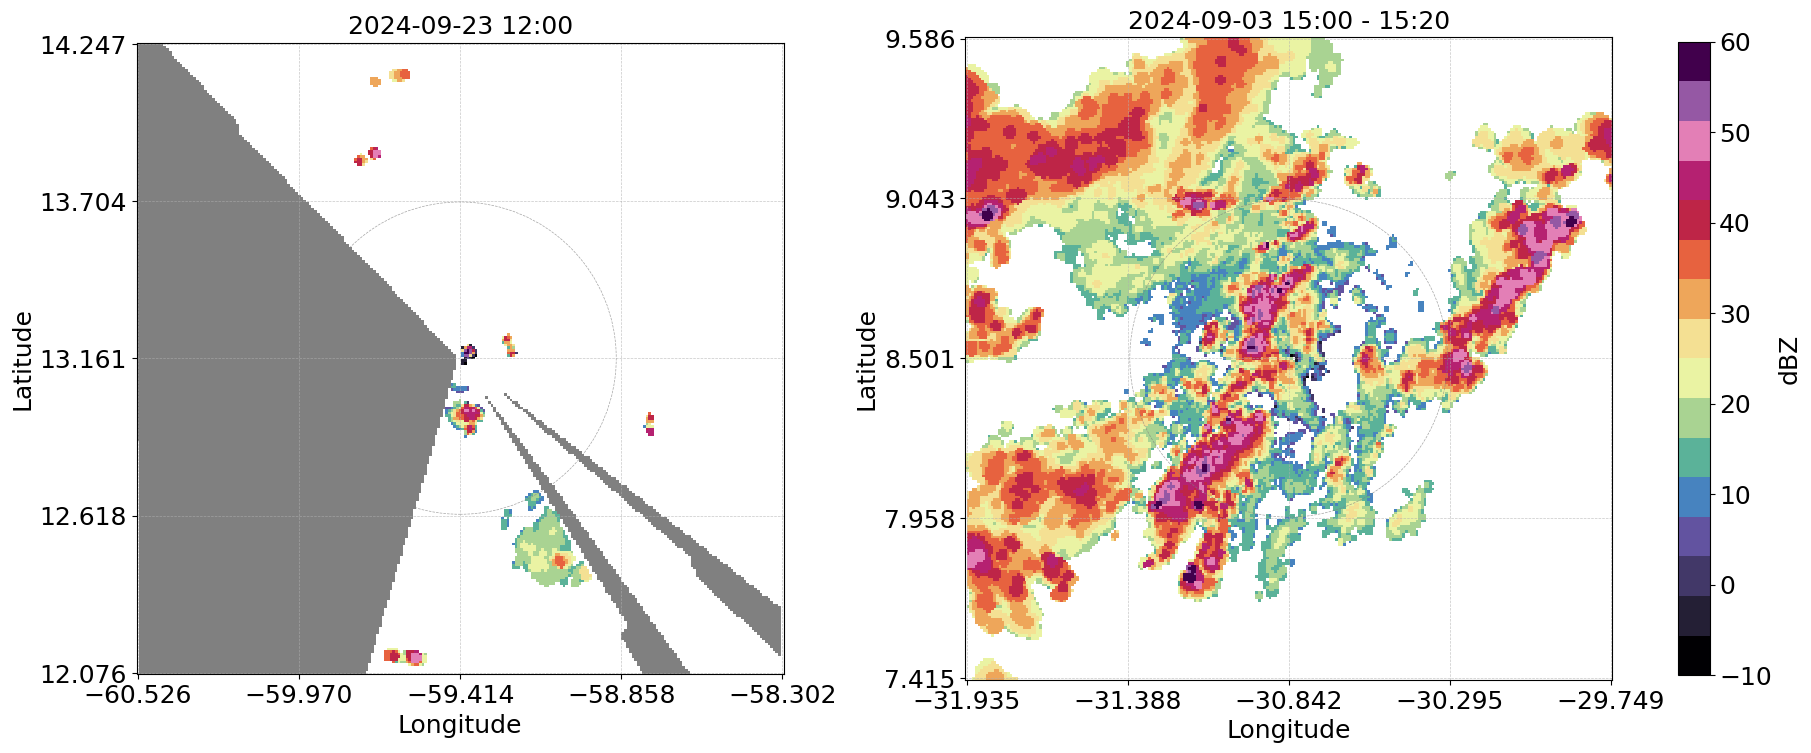

In [60]:
# Make plot
fig, axs = plt.subplots(1,2, figsize=(18, 8),layout="constrained")  # 1 row, 2 column

#Limit to within 120 km of center
ix = np.where((map1.X >= -120000) & (map1.X <= 120000))[0]
iy = np.where((map1.Y >= -120000) & (map1.Y <= 120000))[0]

cax = axs[0].pcolormesh(map1.longitude[ix,iy], map1.latitude[ix,iy], map1[ix,iy], cmap=discrete_mask_cmap, vmin=-10, vmax=60,shading='auto')
axs[0].set_aspect('equal',adjustable='box')
#cbar = fig.colorbar(cax, ax=axs[0], orientation='vertical',pad=0.02, shrink=0.73)
#cbar.ax.tick_params(labelsize=18)
#cbar.set_ticks(np.linspace(-10,60,8))
#cbar.ax.set_ylabel('dBZ', fontsize=18)

axs[0].set_title(str_map1,fontsize=18)    
axs[0].set_ylabel('Latitude', fontsize=18)
axs[0].set_xlabel('Longitude',fontsize=18)
axs[0].set_xticks(np.linspace(np.min(map1.longitude[ix,iy]).values, np.max(map1.longitude[ix,iy]).values, 5))  # Adjust the number of ticks as needed
axs[0].set_yticks(np.linspace(np.min(map1.latitude[ix,iy]).values, np.max(map1.latitude[ix,iy]).values, 5))  # Adjust the number of ticks as needed
axs[0].set_yticks(axs[0].get_yticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=18)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=18)

#Limit to within 120 km of center
ix = np.where((map2.X >= -120000) & (map2.X <= 120000))[0]
iy = np.where((map2.Y >= -120000) & (map2.Y <= 120000))[0]

cax = axs[1].pcolormesh(map2.longitude[ix,iy], map2.latitude[ix,iy], map2[ix,iy], cmap=discrete_mask_cmap, vmin=-10, vmax=60,shading='auto')
axs[1].set_aspect('equal',adjustable='box')

cbar = fig.colorbar(cax, ax=axs[1], orientation='vertical',pad=0.02, shrink=0.8)
cbar.ax.tick_params(labelsize=18)
cbar.set_ticks(np.linspace(-10,60,8))
cbar.ax.set_ylabel('dBZ', fontsize=18)

axs[1].set_title(str_map2,fontsize=18)
axs[1].set_ylabel('Latitude', fontsize=18)
axs[1].set_xlabel('Longitude',fontsize=18)
axs[1].set_xticks(np.linspace(np.min(map2.longitude[ix,iy]).values, np.max(map2.longitude[ix,iy]).values, 5))  # Adjust the number of ticks as needed
axs[1].set_yticks(np.linspace(np.min(map2.latitude[ix,iy]).values, np.max(map2.latitude[ix,iy]).values, 5))  # Adjust the number of ticks as needed
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=18)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=18)

# Add grid lines to the first subplot
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add grid lines to the second subplot
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add 60 km circle
axs[0].add_patch(plt.Circle((map1.longitude[245,245], map1.latitude[245,245]), 60/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))
axs[1].add_patch(plt.Circle((map2.longitude[245,245], map2.latitude[245,245]), 60/111.32, color='gray', alpha = 0.7,fill=False, linestyle='--', linewidth=0.5))

# Save
plt.savefig('seapol_case_overview_zoom.png', dpi=300)